<a href="https://colab.research.google.com/github/AlexKressner/ML_Intro/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Machine Learning: Klassifikation, Beispiel Diabetes

## 1.1 Daten aus Goolge-Drive importieren

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
! git clone https://github.com/AlexKressner/ML_Intro

fatal: destination path 'ML_Intro' already exists and is not an empty directory.


In [ ]:
! ls ML_Intro/

diabetes.txt  House_Price_Prediction.ipynb  house_price.txt  README.md


In [ ]:
data = pd.read_csv("./ML_Intro/diabetes.txt")

## 1.2 Erster Überblick zum Datensatz

In [ ]:
# Kopfzeile der Daten
data.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Größe des Datensatzes
data.shape

(768, 9)

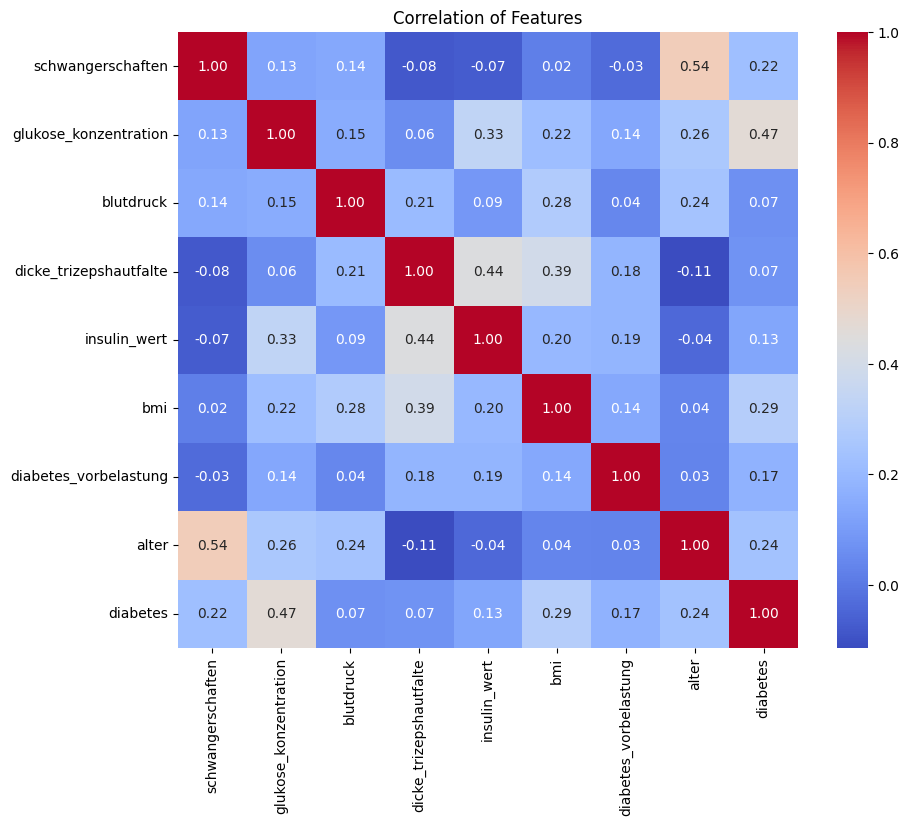

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation of Features')
plt.show()

## 1.3 Training und Testen ML-Modell (Classifier)
Basierend auf den Untersuchungsergebnissen und Personenmerkmalen soll vorhergesagt werden, ob eine Person Diabetes hat oder nicht! Verwenden Sie ein Klassifikationsmodell zur Vorhersage (z.B. Gradient Boosting Classifier).

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics
import matplotlib.pyplot as plt

In [ ]:
# Aufteilung Target und Features
X = data.drop(columns="diabetes")
y = data["diabetes"]

In [ ]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
# Auswahl Prognosemodell
model = GradientBoostingClassifier()

In [ ]:
# Training Modell mit Default-Parametern
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# Modell auf Testdaten anwenden
X_test.head()

,schwangerschaften,glukose_konzentration,blutdruck,dicke_trizepshautfalte,insulin_wert,bmi,diabetes_vorbelastung,alter
51,1,101,50,15,36,24.2,0.526,26
378,4,156,75,0,0,48.3,0.238,32
27,1,97,66,15,140,23.2,0.487,22
579,2,197,70,99,0,34.7,0.575,62
86,13,106,72,54,0,36.6,0.178,45


In [ ]:
y_pred = model.predict(X_test)
y_pred[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
# Bewertung des Modells anhand geeigneter Metriken (z.B. Accuracy)
sklearn.metrics.accuracy_score(y_test, y_pred) * 100

69.48051948051948

In [ ]:
data["diabetes"].value_counts(normalize=True) * 100

,proportion
diabetes,
0,65.104167
1,34.895833


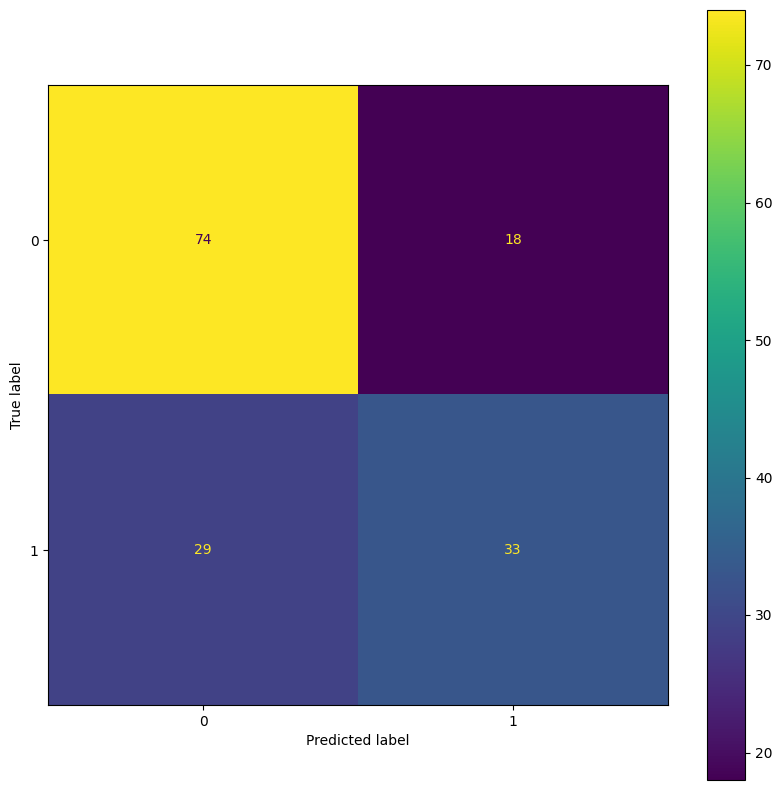

In [ ]:
# Konfusionsmatrix
conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred, labels=model.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp = sklearn.metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Grid definieren
param_grid = {
    "n_estimators": [50, 75, 100, 150, 200] # Anzahl der Entscheidungsbäume
}

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
# Modell auswählen und trainieren
model = GradientBoostingClassifier()
grid = GridSearchCV(
    model, # verwendetes Modell
    param_grid, # zu untersuchende Parameter
    cv=5, # Anzahl der Folds
    n_jobs=-1, # Parallelisierung der Ausführung
    scoring="accuracy", # Fehlermaß
)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

In [ ]:
best_params = grid.best_params_
best_params

{'n_estimators': 75}

In [ ]:
# Modell evaluieren
y_pred = best_model.predict(X_test)
sklearn.metrics.accuracy_score(y_test, y_pred) * 100

70.77922077922078